In [ ]:
#Pasoi Sofia, 2798, 6o etos
from matplotlib import pyplot as plt
from decimal import Decimal
from PIL import Image
import numpy as np
import sys
from matplotlib import rc
from matplotlib import image as mpimg


def thresholding(pixelValue,threshold):
    if(pixelValue<=threshold):
        timage=0 
    else:
        timage=255 
    return timage

def isColored(img):
    if(len(img.shape)==3):
        return True
    elif(len(img.shape)==2):
        return False


def imageProccessing(img):
    rows=img.shape[0]
    columns=img.shape[1]
    colored=np.zeros([rows,columns])
    if(isColored(img)):  
        #img=Decimal(img)
        for m in range (0,rows):
            for n in range (0,columns):
                colored[m][n]=(img[m][n][0]+img[m][n][1]+img[m][n][2])/3
        return colored
    else: 
        return img


def ypologise_antikeimeniki_otsu(neighborhood, k):
    pixels_tmima1 = neighborhood[neighborhood < k]
    pixels_tmima2 = neighborhood[neighborhood >=k]
    mu1 = np.mean(pixels_tmima1)
    mu2 = np.mean(pixels_tmima2)
    mu_synoliko = np.mean(neighborhood.flatten())
    pi1 = len(pixels_tmima1) / (len(pixels_tmima1) + len(pixels_tmima2))
    pi2 = len(pixels_tmima2) / (len(pixels_tmima1) + len(pixels_tmima2))
    antikeimeniki_synartisi = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
    return(antikeimeniki_synartisi)


def otsu_thresholder(neighborhood, pixelValue):
    kalytero_katwfli = 0
    kalyterh_timi = 0
    for i in range(0,neighborhood.shape[0]): 
        obj_otsu = ypologise_antikeimeniki_otsu(neighborhood, neighborhood[i])
        if(obj_otsu > kalyterh_timi): 
            kalytero_katwfli = neighborhood[i]
            kalyterh_timi = obj_otsu
    res = thresholding(pixelValue,kalytero_katwfli)
    return(res) 

def imageThr(image,winrows,wincols,rows,columns): 
    timage= np.zeros([rows,columns])
    m =winrows
    n=wincols
    if(m%2==0): 
        m=int(m/2 + 1)
        if(n%2==0):
            n=int(n/2 + 1)    
        else: 
            n=int(n/2 - 1/2)        
    else: 
        m=int(m/2- 1/2)
    
        if(n%2==0):
            n=int(n/2 + 1)    
        else:     
            n=int(n/2 - 1/2)
      
    for i in range(0, rows):
        for j in range(0,columns):
            neighborhood=np.array([])
            for k in range(-n,n+1):
                a=np.array([])
                for z in range(-m,m+1):
                    if(i+k>=0): 
                        if(i+k<rows):
                            if(j+z>=0):
                                if(j+z<columns):
                                    a=np.append(a, image[i+k][j+z], axis=None)
                if(len(a)!=0):   
                    neighborhood=np.append(neighborhood, a)
           
            thr_pixel=otsu_thresholder(neighborhood,image[i][j])
            
            timage[i][j]=thr_pixel 
            
    return timage

def printImage(thr,filename,window_size,img):
    plt.ylim(thr.shape[0],0)
    plt.xlim(0,thr.shape[1])
    plt.subplots_adjust(left=0.1,bottom=0.19,right=0.9,top=0.96)
    s="window_size of neighborhood: " + str(window_size)
    plt.xlabel(s) 
    plt.imshow(thr,cmap="gray")
    plt.show()
    Image.fromarray(thr.astype(np.uint8)).save(filename) 

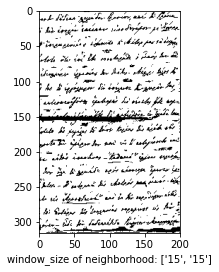

In [3]:
def main():
    img=np.array(Image.open("/home/adminn/Desktop/YPOL/1.png")) 
    rows=img.shape[0]
    columns=img.shape[1]
    str="out.png"
    window_size="15x15"
    window_size=window_size.split("x")
    winrows=int(window_size[0])
    wincols=int(window_size[1])
    image=imageProccessing(img)
    thr=imageThr(image,winrows,wincols,rows,columns)
    printImage(thr,str,window_size,img)
  
main()


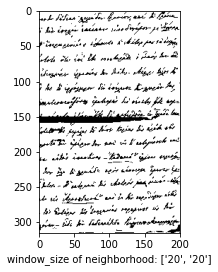

In [4]:

def main():
    img=np.array(Image.open("/home/adminn/Desktop/YPOL/1.png")) 
    rows=img.shape[0]
    columns=img.shape[1]
    str="out.png"
    window_size="20x20"
    window_size=window_size.split("x")
    winrows=int(window_size[0])
    wincols=int(window_size[1])
    image=imageProccessing(img)
    thr=imageThr(image,winrows,wincols,rows,columns)
    printImage(thr,str,window_size,img)
  
main()

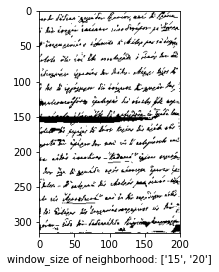

In [5]:

def main():
    img=np.array(Image.open("/home/adminn/Desktop/YPOL/1.png")) 
    rows=img.shape[0]
    columns=img.shape[1]
    str="out.png"
    window_size="15x20"
    window_size=window_size.split("x")
    winrows=int(window_size[0])
    wincols=int(window_size[1])
    image=imageProccessing(img)
    thr=imageThr(image,winrows,wincols,rows,columns)
    printImage(thr,str,window_size,img)
  
main()

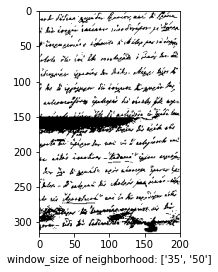

In [10]:

def main():
    img=np.array(Image.open("/home/adminn/Desktop/YPOL/1.png")) 
    rows=img.shape[0]
    columns=img.shape[1]
    str="out.png"
    window_size="35x50"
    window_size=window_size.split("x")
    winrows=int(window_size[0])
    wincols=int(window_size[1])
    image=imageProccessing(img)
    thr=imageThr(image,winrows,wincols,rows,columns)
    printImage(thr,str,window_size,img)
main()

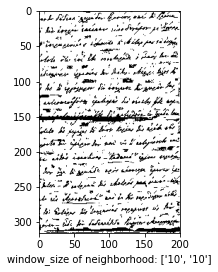

In [1]:

def main():
    img=np.array(Image.open("/home/adminn/Desktop/YPOL/1.png")) 
    rows=img.shape[0]
    columns=img.shape[1]
    str="out.png"
    window_size="10x10"
    window_size=window_size.split("x")
    winrows=int(window_size[0])
    wincols=int(window_size[1])
    image=imageProccessing(img)
    thr=imageThr(image,winrows,wincols,rows,columns)
    printImage(thr,str,window_size,img)
main()

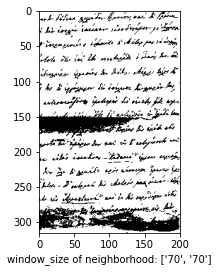

In [1]:
from matplotlib import pyplot as plt
from decimal import Decimal
from PIL import Image
import numpy as np
import sys
from matplotlib import rc
from matplotlib import image as mpimg


def thresholding(pixelValue,threshold):
    if(pixelValue<=threshold):
        timage=0 
    else:
        timage=255 
    return timage

def isColored(img):
    if(len(img.shape)==3):
        return True
    elif(len(img.shape)==2):
        return False


def imageProccessing(img):
    rows=img.shape[0]
    columns=img.shape[1]
    colored=np.zeros([rows,columns])
    if(isColored(img)):  
        #img=Decimal(img)
        for m in range (0,rows):
            for n in range (0,columns):
                colored[m][n]=(img[m][n][0]+img[m][n][1]+img[m][n][2])/3
        return colored
    else: 
        return img


def ypologise_antikeimeniki_otsu(neighborhood, k):
    pixels_tmima1 = neighborhood[neighborhood < k]
    pixels_tmima2 = neighborhood[neighborhood >=k]
    mu1 = np.mean(pixels_tmima1)
    mu2 = np.mean(pixels_tmima2)
    mu_synoliko = np.mean(neighborhood.flatten())
    pi1 = len(pixels_tmima1) / (len(pixels_tmima1) + len(pixels_tmima2))
    pi2 = len(pixels_tmima2) / (len(pixels_tmima1) + len(pixels_tmima2))
    antikeimeniki_synartisi = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
    return(antikeimeniki_synartisi)


def otsu_thresholder(neighborhood, pixelValue):
    kalytero_katwfli = 0
    kalyterh_timi = 0
    for i in range(0,neighborhood.shape[0]): 
        obj_otsu = ypologise_antikeimeniki_otsu(neighborhood, neighborhood[i])
        if(obj_otsu > kalyterh_timi): 
            kalytero_katwfli = neighborhood[i]
            kalyterh_timi = obj_otsu
    res = thresholding(pixelValue,kalytero_katwfli)
    return(res) 

def imageThr(image,winrows,wincols,rows,columns): 
    timage= np.zeros([rows,columns])
    m =winrows
    n=wincols
    if(m%2==0): 
        m=int(m/2 + 1)
        if(n%2==0):
            n=int(n/2 + 1)    
        else: 
            n=int(n/2 - 1/2)        
    else: 
        m=int(m/2- 1/2)
    
        if(n%2==0):
            n=int(n/2 + 1)    
        else:     
            n=int(n/2 - 1/2)
      
    for i in range(0, rows):
        for j in range(0,columns):
            neighborhood=np.array([])
            for k in range(-n,n+1):
                a=np.array([])
                for z in range(-m,m+1):
                    if(i+k>=0): 
                        if(i+k<rows):
                            if(j+z>=0):
                                if(j+z<columns):
                                    a=np.append(a, image[i+k][j+z], axis=None)
                if(len(a)!=0):   
                    neighborhood=np.append(neighborhood, a)
           
            thr_pixel=otsu_thresholder(neighborhood,image[i][j])
            
            timage[i][j]=thr_pixel 
            
    return timage

def printImage(thr,filename,window_size,img):
    plt.ylim(thr.shape[0],0)
    plt.xlim(0,thr.shape[1])
    plt.subplots_adjust(left=0.1,bottom=0.19,right=0.9,top=0.96)
    s="window_size of neighborhood: " + str(window_size)
    plt.xlabel(s) 
    plt.imshow(thr,cmap="gray")
    plt.show()
    Image.fromarray(thr.astype(np.uint8)).save(filename) 

def main():
    img=np.array(Image.open("/home/adminn/Desktop/YPOL/1.png")) 
    rows=img.shape[0]
    columns=img.shape[1]
    str="out.png"
    window_size="70x70"
    window_size=window_size.split("x")
    winrows=int(window_size[0])
    wincols=int(window_size[1])
    image=imageProccessing(img)
    thr=imageThr(image,winrows,wincols,rows,columns)
    printImage(thr,str,window_size,img)
main()

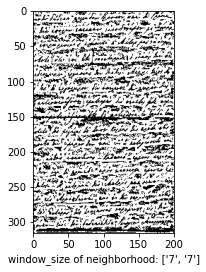

In [2]:
from matplotlib import pyplot as plt
from decimal import Decimal
from PIL import Image
import numpy as np
import sys
from matplotlib import rc
from matplotlib import image as mpimg


def thresholding(pixelValue,threshold):
    if(pixelValue<=threshold):
        timage=0 
    else:
        timage=255 
    return timage

def isColored(img):
    if(len(img.shape)==3):
        return True
    elif(len(img.shape)==2):
        return False


def imageProccessing(img):
    rows=img.shape[0]
    columns=img.shape[1]
    colored=np.zeros([rows,columns])
    if(isColored(img)):  
        #img=Decimal(img)
        for m in range (0,rows):
            for n in range (0,columns):
                colored[m][n]=(img[m][n][0]+img[m][n][1]+img[m][n][2])/3
        return colored
    else: 
        return img


def ypologise_antikeimeniki_otsu(neighborhood, k):
    pixels_tmima1 = neighborhood[neighborhood < k]
    pixels_tmima2 = neighborhood[neighborhood >=k]
    mu1 = np.mean(pixels_tmima1)
    mu2 = np.mean(pixels_tmima2)
    mu_synoliko = np.mean(neighborhood.flatten())
    pi1 = len(pixels_tmima1) / (len(pixels_tmima1) + len(pixels_tmima2))
    pi2 = len(pixels_tmima2) / (len(pixels_tmima1) + len(pixels_tmima2))
    antikeimeniki_synartisi = pi1 * (mu1 - mu_synoliko)**2 + pi2 * (mu2 - mu_synoliko)**2
    return(antikeimeniki_synartisi)


def otsu_thresholder(neighborhood, pixelValue):
    kalytero_katwfli = 0
    kalyterh_timi = 0
    for i in range(0,neighborhood.shape[0]): 
        obj_otsu = ypologise_antikeimeniki_otsu(neighborhood, neighborhood[i])
        if(obj_otsu > kalyterh_timi): 
            kalytero_katwfli = neighborhood[i]
            kalyterh_timi = obj_otsu
    res = thresholding(pixelValue,kalytero_katwfli)
    return(res) 

def imageThr(image,winrows,wincols,rows,columns): 
    timage= np.zeros([rows,columns])
    m =winrows
    n=wincols
    if(m%2==0): 
        m=int(m/2 + 1)
        if(n%2==0):
            n=int(n/2 + 1)    
        else: 
            n=int(n/2 - 1/2)        
    else: 
        m=int(m/2- 1/2)
    
        if(n%2==0):
            n=int(n/2 + 1)    
        else:     
            n=int(n/2 - 1/2)
      
    for i in range(0, rows):
        for j in range(0,columns):
            neighborhood=np.array([])
            for k in range(-n,n+1):
                a=np.array([])
                for z in range(-m,m+1):
                    if(i+k>=0): 
                        if(i+k<rows):
                            if(j+z>=0):
                                if(j+z<columns):
                                    a=np.append(a, image[i+k][j+z], axis=None)
                if(len(a)!=0):   
                    neighborhood=np.append(neighborhood, a)
           
            thr_pixel=otsu_thresholder(neighborhood,image[i][j])
            
            timage[i][j]=thr_pixel 
            
    return timage

def printImage(thr,filename,window_size,img):
    plt.ylim(thr.shape[0],0)
    plt.xlim(0,thr.shape[1])
    plt.subplots_adjust(left=0.1,bottom=0.19,right=0.9,top=0.96)
    s="window_size of neighborhood: " + str(window_size)
    plt.xlabel(s) 
    plt.imshow(thr,cmap="gray")
    plt.show()
    Image.fromarray(thr.astype(np.uint8)).save(filename) 

def main():
    img=np.array(Image.open("/home/adminn/Desktop/YPOL/1.png")) 
    rows=img.shape[0]
    columns=img.shape[1]
    str="out.png"
    window_size="7x7"
    window_size=window_size.split("x")
    winrows=int(window_size[0])
    wincols=int(window_size[1])
    image=imageProccessing(img)
    thr=imageThr(image,winrows,wincols,rows,columns)
    printImage(thr,str,window_size,img)
main()